In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [52]:
col_names = ['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']
df = pd.read_csv('ad_click_dataset.csv', names=col_names, header=None)

In [53]:
df = df.sort_values(by="id", ascending=True)
df = df.drop(['id', 'full_name'], axis=1)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].mean(), inplace=True)
df = pd.get_dummies(df, columns=['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day'])

<ipython-input-53-9519e5ea98c8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [40]:
X = df.drop('click', axis=1)
Y = df['click']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [42]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [43]:
Y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7317560813062313


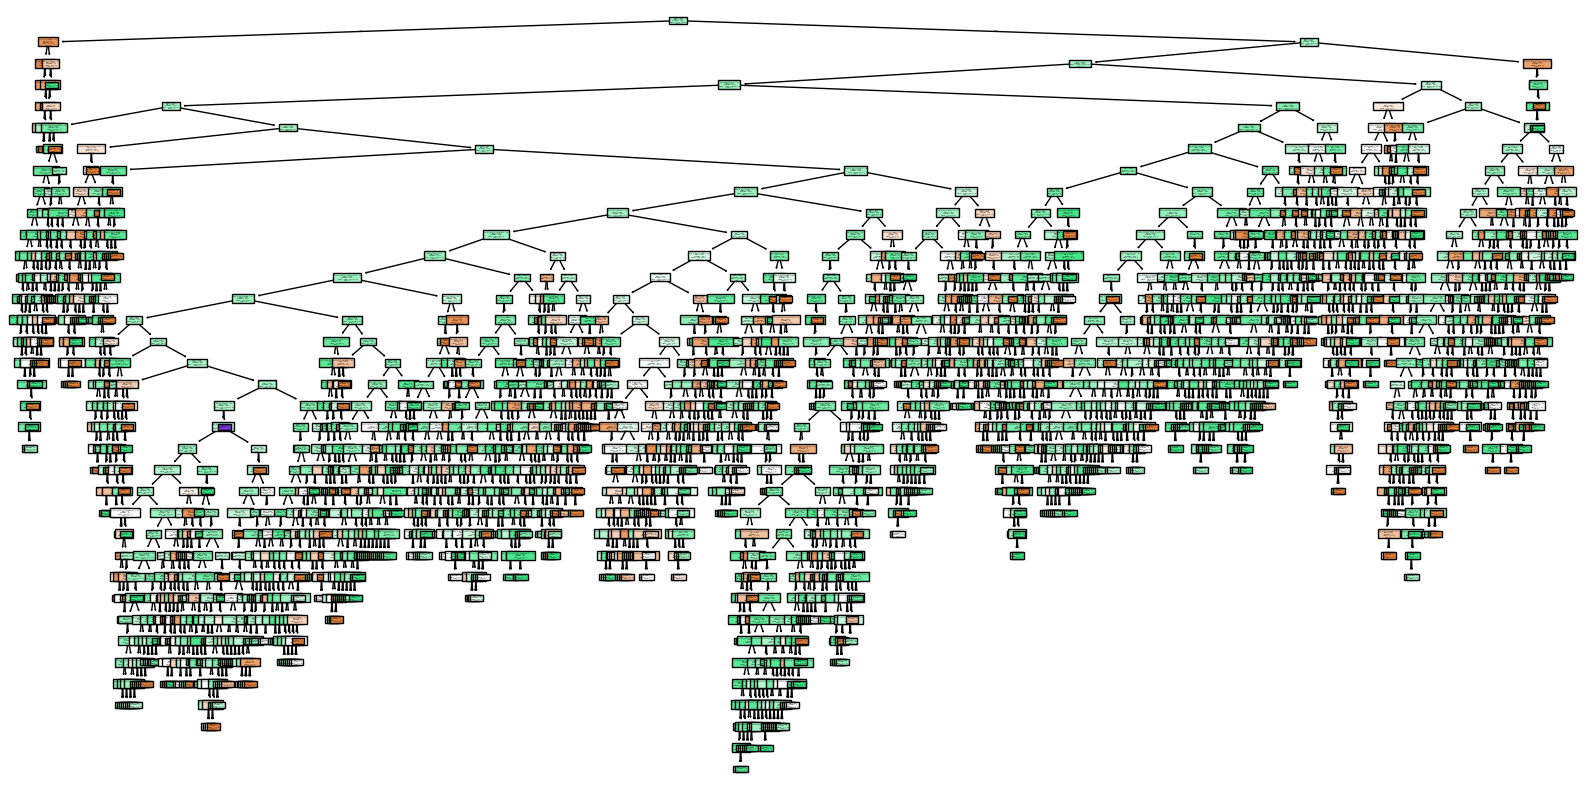

In [57]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()